In [69]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

In [88]:
%load_ext autoreload
%autoreload 2
import plot_chameleon as plt_chi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
kwargs_dflt = {
    "err": 1E-8,
    "n": 0.5,
    "print_par" : 1,
    "out_dir" : "../output/"
}
sim = plt_chi.Simulation("../build/main.a", **kwargs_dflt)

In [109]:
kwargs_sim = {
    "mod" : 1,
    "Omega_m" : 1,
    "c" : 16,
    "M200_sun" : 10,
    "Ys" : 0,
    "R_eq" : 10
}

sim.set_kwargs(**kwargs_sim)

In [110]:
sim.run()

Running command '../build/main.a --err=1e-08 --n=0.5 --print_par=1 --out_dir=../output/ --mod=1 --Omega_m=1 --c=16 --M200_sun=10 --Ys=0 --R_eq=10'
[2020-07-14 02:07:07.608724] [0x00007fde163d8740] [warning] Cannot open config file 'input.cfg'. Using default and command lines values.
[2020-07-14 02:07:07.608786] [0x00007fde163d8740] [debug]   Pot(0) = -83.4992
[2020-07-14 02:07:07.608790] [0x00007fde163d8740] [debug]   Pot(R) = -57.8773
[2020-07-14 02:07:07.608793] [0x00007fde163d8740] [debug]   Pot(R_eq) = -64.3043
[2020-07-14 02:07:07.608796] [0x00007fde163d8740] [info]    Capacity: 171
[2020-07-14 02:07:07.608838] [0x00007fde163d8740] [info]    Parameters given through command line options, through configuration file, or derived:

Generic options:
	mod = 1
Integration options:
	err = 1e-08	step / R_s = 1.53561	r_max / R_s = 183273
Spatial parameters:
	c = 16	R / R_s = 15.3561	R200 / R_s = 245.697	rho_c = 4.40959e+15	rho_0 = 4.76815e+09	M200 / M_s = 10	Ms / M_s = 5.28531	M200_sun = 10

In [37]:
in_dir = "../output/"

In [38]:
run_dir = "NFW"
pot_file = "potential.dat"
for_file = "forces.dat"

In [39]:
cur_pot_file = os.path.join(in_dir, run_dir, pot_file)
cur_for_file = os.path.join(in_dir, run_dir, for_file)

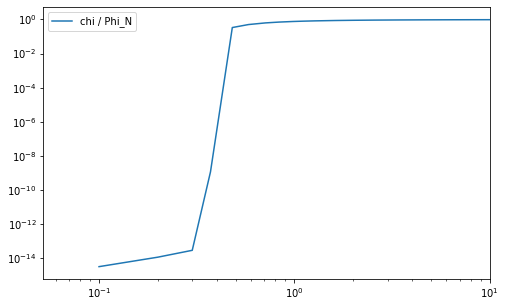

In [53]:
data = np.loadtxt(cur_for_file).transpose()
r, force = data

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax.plot(r, force, label="chi / Phi_N")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(xmax=10)
plt.legend()
plt.show()

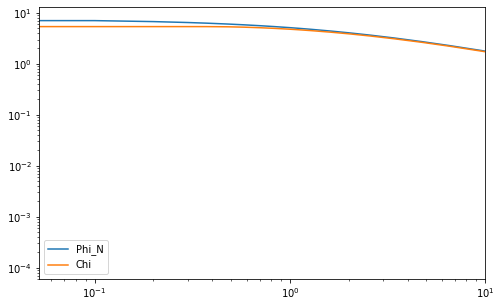

In [52]:
data = np.loadtxt(cur_pot_file).transpose()
r, phi, chi = data

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax.plot(r, phi, label="Phi_N")
ax.plot(r, chi, label="Chi")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(xmax=10)
plt.legend()
plt.show()